<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 3: *Data Preparation & Dimensionality Reduction***

###**Tenggat Waktu: 24 Februari 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab2_2106751404_NaznienFevrianneMalano.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 24 Februari 2024, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
6. Pernyataan Integritas Wajib diisi dan dijalankan.
7. Seluruh kode wajib dijalankan.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [2]:
# Isi dengan data diri Anda
NAMA = "Sri Saraswati Widhisari"
KELAS = "B"
NPM = "2206812180"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [3]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sri Saraswati Widhisari dari kelas B dengan NPM 2206812180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sri Saraswati Widhisari)


## Import Library Data

Jalankan kode berikut jika mengerjakan melalui Google Collab

In [4]:
# from google.colab import drive
# drive.mount('/content/drive/')

Sumber Data: https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction dengan pengubahan

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler

In [6]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_csv('second_car_pricing.csv')

## Deskripsi Data

Data ini merupakan data harga mobil second yang dijual pada suatu website di India. Deskripsi kolom: 
- `Name`: merk dan model mobil 
- `Location`: lokasi tempat mobil dijual
- `Year`: tahun mobil diproduksi
- `Kilometers_Driven`: total jarak ditempuh dalam km
- `Fuel_Type`: tipe bahan bakar mobil (Petrol, Diesel, Electric, CNG, LPG)
- `Transmission`: tipe transmisi (Automatic/Manual)
- `Owner_Type`: jarak antar roda depan dan roda belakang mobil dalam inch
- `Mileage`: rasio jumlah jarak ditempuh dengan jumlah bahan bakar dikonsumsi dalam km/l atau km/kg
- `Engine`: volume mesin dalam CC
- `Power`: kekuatan mesin dalam Brake Horse Power (bhp)
- `Seats`: jumlah tempat duduk
- `New_Price`: referensi harga mobil pada kondisi baru 


Target variable — `Price`: harga mobil dalam Lakh INR (1 Lakh = 100.000 INR)

In [8]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6218.000000,4.042000e+03,6175.000000,6218.000000
mean,2013.358154,5.976506e+04,5.277733,9.479341
std,3.262506,1.088091e+05,0.808191,11.146452
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.303975e+04,5.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6218 non-null   object 
 1   Location           6218 non-null   object 
 2   Year               6218 non-null   int64  
 3   Kilometers_Driven  4042 non-null   float64
 4   Fuel_Type          5472 non-null   object 
 5   Transmission       5783 non-null   object 
 6   Owner_Type         6218 non-null   object 
 7   Mileage            4352 non-null   object 
 8   Engine             6181 non-null   object 
 9   Power              6069 non-null   object 
 10  Seats              6175 non-null   float64
 11  New_Price          856 non-null    object 
 12  Price              6218 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 631.6+ KB


# Data Preparation

*Data Preparation* atau *data preprocessing* adalah suatu proses pembersihan dan transformasi pada *raw data* sebelum diproses dan dianalisis. Tujuan dari melakukan preparasi adalah dengan membersihkan data, hasil analisis dan prediksi dapat lebih akurat dan lebih bermakna.
<br> Data didapatkan dengan berbagai macam cara yang juga seringkali menghasilkan kekurangan pada data yang diproduksi, diantaranya duplikat, nilai yang salah, nilai yang hilang, dsb.
<br> Pada beberapa algoritma prediksi, dibutuhkan *preprocessing* khusus agar algoritma dapat berjalan dengan baik.

## Feature Extraction

Tahapan ini dilakukan untuk mengubah format awal data menjadi format yang kita butuhkan. Seringkali *raw data* diperoleh dalam format yang tidak sesuai dengan kebutuhan analisis kita. Melakukan tahap ini diperlukan pengetahuan terkait *domain* dan *karakteristik* atribut data yang hendak diubah agar format data yang dihasilkan sesuai

In [10]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mitsubishi Pajero 4X4 LHD,Bangalore,2012,155566.0,Diesel,Manual,Second,9.5 kmpl,2835 CC,118.6 bhp,6.0,NaN,9.15
1,Honda City i DTEC VX,Jaipur,2014,74000.0,Diesel,Manual,Second,25.1 kmpl,1498 CC,98.6 bhp,5.0,NaN,6.40
2,Hyundai Creta 1.6 SX Plus Diesel,Kochi,2018,NaN,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,13.34
3,Hyundai Elantra CRDi SX AT,Mumbai,2013,51000.0,Diesel,Automatic,First,19.5 kmpl,1582 CC,126.24 bhp,5.0,NaN,8.75
4,Honda City Corporate Edition,Mumbai,2012,51920.0,Petrol,Manual,First,NaN,1497 CC,116.3 bhp,5.0,NaN,4.25


Jika kita lihat, pada atribut `Mileage`, `Engine`, dan `Power` masih menggunakan satuan pada setiap baris data. Ini merupakan **redundansi** karena seharusnya satuan data cukup untuk diketahui pada bagian kolom saja. Untuk itu, kita dapat menghapus satuannya menggunakan kode berikut ini.

In [11]:
df['Mileage'] = df['Mileage'].str.replace('kmpl','')
df['Mileage'] = df['Mileage'].str.replace('km/kg','')
df['Engine'] = df['Engine'].str.replace('CC','')
df['Power'] = df['Power'].str.replace('bhp','')

Dari atribut `Name` terlihat bahwa merk dan model mobil masih tergabung. Kita dapat membuat kolom baru `Brand` agar mempermudah proses analisis. 

In [12]:
df['Brand'] = df['Name'].str.split().str[0]

Terlihat bahwa merk selalu berada di kata paling awal, untuk itu kita bisa menggunakan *splitting* dan mengambil indeks 0 untuk atribut merk. 

In [13]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Mitsubishi Pajero 4X4 LHD,Bangalore,2012,155566.0,Diesel,Manual,Second,9.5,2835,118.6,6.0,NaN,9.15,Mitsubishi
1,Honda City i DTEC VX,Jaipur,2014,74000.0,Diesel,Manual,Second,25.1,1498,98.6,5.0,NaN,6.40,Honda
2,Hyundai Creta 1.6 SX Plus Diesel,Kochi,2018,NaN,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,13.34,Hyundai
3,Hyundai Elantra CRDi SX AT,Mumbai,2013,51000.0,Diesel,Automatic,First,19.5,1582,126.24,5.0,NaN,8.75,Hyundai
4,Honda City Corporate Edition,Mumbai,2012,51920.0,Petrol,Manual,First,NaN,1497,116.3,5.0,NaN,4.25,Honda


In [14]:
df['Brand'].unique()

array(['Mitsubishi', 'Honda', 'Hyundai', 'Volkswagen', 'BMW', 'Ford',
       'Audi', 'Jeep', 'Renault', 'Mercedes-Benz', 'Maruti', 'Jaguar',
       'Skoda', 'Mahindra', 'Mini', 'Toyota', 'Nissan', 'Tata',
       'Chevrolet', 'Fiat', 'Volvo', 'Land', 'Porsche', 'Datsun', 'Isuzu',
       'Force', 'Smart', 'ISUZU', 'Lamborghini', 'Ambassador', 'Bentley'],
      dtype=object)

Nilai unik pada atribut `Brand`

Data yang sudah diubah formatnya ini masih perlu diubah ke dalam tipe data **numeric** karena sebelumnya masih bertipe **object** berupa string. 

In [15]:
df['Power'] = pd.to_numeric(df['Power'])
df['Engine'] = pd.to_numeric(df['Engine'])
df['Mileage'] = pd.to_numeric(df['Mileage'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6218 non-null   object 
 1   Location           6218 non-null   object 
 2   Year               6218 non-null   int64  
 3   Kilometers_Driven  4042 non-null   float64
 4   Fuel_Type          5472 non-null   object 
 5   Transmission       5783 non-null   object 
 6   Owner_Type         6218 non-null   object 
 7   Mileage            4352 non-null   float64
 8   Engine             6181 non-null   float64
 9   Power              6069 non-null   float64
 10  Seats              6175 non-null   float64
 11  New_Price          856 non-null    object 
 12  Price              6218 non-null   float64
 13  Brand              6218 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 680.2+ KB


Sekarang data sudah berhasil diubah ke dalam tipe data yang sesuai serta telah berhasil membuat kolom baru berupa `Brand`

Selanjutnya, kita akan men-drop atribut `Name` karena sudah tidak terlalu berguna dan hanya berfungsi sebagai identifier. Seperti yang kita tahu, identifier jika dibiarkan tidak terlalu berguna pada prediksi dan bahkan bisa menyebabkan **overfitting**. Alasan lain melakukan **drop column** lebih lengkapnya dapat dilihat pada *missing value handling* di bawah.

In [17]:
df = df.drop('Name',axis=1)

**NOTE**: Membuat kolom/atribut baru secara umum perlu dilakukan dengan suatu tujuan atau alasan yang jelas serta harus sesuai dengan konteks awal pengumpulan data 

## Duplicate Values Handling

Tahapan selanjutnya adalah melakukan pembersihan untuk data duplikat/redundan. Berikut merupakan kode untuk menampilkan jumlah **baris** yang duplikat, yaitu baris yang nilainya memilki nilai sama persis untuk semua kolomnya. 

In [18]:
df.duplicated().sum()

47

### SOAL 1a: 
Berikan implementasi kode untuk menampilkan rows/baris mana saja yang merupakan duplikat. <br> **Hint:** gunakan sintaks indexing. Hasil akhir akan menampilkan dataframe beserta semua kolom

In [19]:
# GUNAKAN variabel ini
df_dropped = df.copy()

In [20]:
# Kode anda disini
df_dropped.loc[df_dropped.isna().any(axis=1)]
#pakai indexing untuk ambil yang isna().any() 


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Bangalore,2012,155566.0,Diesel,Manual,Second,9.50,2835.0,118.60,6.0,NaN,9.15,Mitsubishi
1,Jaipur,2014,74000.0,Diesel,Manual,Second,25.10,1498.0,98.60,5.0,NaN,6.40,Honda
2,Kochi,2018,NaN,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,13.34,Hyundai
3,Mumbai,2013,51000.0,Diesel,Automatic,First,19.50,1582.0,126.24,5.0,NaN,8.75,Hyundai
4,Mumbai,2012,51920.0,Petrol,Manual,First,NaN,1497.0,116.30,5.0,NaN,4.25,Honda
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,Mumbai,2012,NaN,Diesel,Manual,First,15.10,2179.0,140.00,7.0,NaN,7.90,Mahindra
6214,Mumbai,2014,30180.0,Petrol,Manual,First,18.50,1197.0,82.85,5.0,NaN,4.65,Hyundai
6215,Pune,2013,47000.0,Petrol,Manual,First,18.00,1198.0,86.70,5.0,NaN,4.15,Honda
6216,Kochi,2019,NaN,Petrol,Automatic,First,14.67,1798.0,177.46,5.0,36.15 Lakh,27.30,Skoda


### SOAL 1b: 
Berikan implementasi kode untuk melakukan penghapusan duplikat, simpan ke dalam variabel dataframe baru, dan tampilkan hasil bahwa duplikat telah di drop  <br> **Hint:** gunakan sintaks dari dokumentasi https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html.

In [21]:
# Kode anda disini
#menghapus duplikat dan masukkan ke df_dropped
df_hasil_drop = df_dropped.drop_duplicates()
#ingat yang diassign adalah hasil df yang sudah didrop duplikat, bukan data yg duplikatnya 
# Tampilkan bahwa jumlah duplikat value telah kosong

In [22]:
#df yang tidak memiliki duplikat 
df_hasil_drop

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Bangalore,2012,155566.0,Diesel,Manual,Second,9.50,2835.0,118.60,6.0,NaN,9.15,Mitsubishi
1,Jaipur,2014,74000.0,Diesel,Manual,Second,25.10,1498.0,98.60,5.0,NaN,6.40,Honda
2,Kochi,2018,NaN,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,13.34,Hyundai
3,Mumbai,2013,51000.0,Diesel,Automatic,First,19.50,1582.0,126.24,5.0,NaN,8.75,Hyundai
4,Mumbai,2012,51920.0,Petrol,Manual,First,NaN,1497.0,116.30,5.0,NaN,4.25,Honda
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,Kolkata,2019,80000.0,Diesel,Manual,First,NaN,2982.0,171.00,7.0,NaN,8.99,Toyota
6213,Mumbai,2012,NaN,Diesel,Manual,First,15.10,2179.0,140.00,7.0,NaN,7.90,Mahindra
6215,Pune,2013,47000.0,Petrol,Manual,First,18.00,1198.0,86.70,5.0,NaN,4.15,Honda
6216,Kochi,2019,NaN,Petrol,Automatic,First,14.67,1798.0,177.46,5.0,36.15 Lakh,27.30,Skoda


In [23]:
#menunjukkan bahwa tidak ada data yang duplikat pada df_hasil_drop
df_hasil_drop.duplicated().sum()

0

### SOAL 1c: 
Jika ini adalah proyek analisis data pribadi Anda, apakah Anda akan melakukan drop duplicates? Jelaskan alasan Anda!

> Saya akan melakukan drop duplicates. Karena, duplikat biasanya diciptakan kesalahan saat input data. 
1) Data yang duplikat mengulang nilai yang sama yang tidak berkontribusi lebih pada performa dari model nantinya. Redundansi yang terlalu banyak pada suatu nilai pada row data  bsia membuat pusat data menjadi berfokus pada data tersebut. Hal ini bisa mengubah kualitas dan akurasi dari data, karena muncul skewness data yang membuat insight dari data tersebut tidak tepat. Misalnya, ternyata owner type first dengan nilai attribut lainnya yang menggunakan brand Honda, padahal sebenarnya representasi owner dengan type dan nilai attribut yang sama berulang berkali-kali. 
2) Data yang duplikat juga membuat inkonsistensi dan kebingungan dalam menentukan data yang mana untuk pengolahan berikutnya. Misalnya, ada data customer churn, dan identifer yang unik adalah nomor telepon, ternyata satu nomor telepon bisa dimiliki oleh dua orang di data, ini membuat data menjadi inkonsisten. Karena ini bisa saja mengindikasikan ada satu customer dihitung satu, atau ada kesalhaan pencatatan nomor telepon untuk customer satunya lagi. 

Referensi : https://medium.com/@ayushmandurgapal/handling-duplicate-values-and-outliers-in-a-dataset-b00ce130818e

## Missing Values Handling

Seringkali *raw data* yang diperoleh memiliki data yang *missing* atau hilang. Biasanya, nilai yang hilang akan berupa **entry yang kosong** atau berupa **object None** pada tabel. Kedua tipe ini dapat dideteksi secara mudah menggunakan method dari Pandas. <br> <br> Namun juga, terkadang data yang hilang telah disubsitutusi oleh nilai pengganti seperti 0 atau string "null" dan sebagainya tergantung sistem pengumpulan data yang dilakukan. Untuk itu, sekali lagi penting untuk mengetahui kondisi data.

### SOAL 2a: 
Pada konteks dataset ini, *missing values* berupa nilai **kosong** atau NaN yang dapat dideteksi dengan mudah menggunakan method Pandas. Lengkapi implementasi kode berikut untuk menampilkan **jumlah** serta **persentase** *missing values* untuk setiap kolom secara **descending** (kolom dengan persentase null paling banyak berada di paling atas) setelah itu jalankan method ini pada dataframe! <br> **Note:** Pastikan Anda menggunakan DataFrame yang telah di drop nilai duplikatnya

In [24]:
# Lengkapi implementasi kode mengecek null:
#menggunakan dataset yang sudah didrop hasil duplikatnya 
def cek_null(df_hasil_drop):
    #isna ga perlu pakai axis
    col_na = df_hasil_drop.isna().sum()
    percent = (col_na/ len(df_hasil_drop))* 100
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total Missing', 'Missing Percentage'])
    #sort missing data dari sini bedasarkan misisng percentage atau total missing sama saja 
    missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
    print(missing_data)

In [25]:
# Kode anda disini
cek_null(df_hasil_drop)


                   Total Missing  Missing Percentage
New_Price                   5320           86.209690
Kilometers_Driven           2163           35.051045
Mileage                     1858           30.108572
Fuel_Type                    744           12.056393
Transmission                 435            7.049101
Power                        148            2.398315
Seats                         43            0.696808
Engine                        37            0.599579
Location                       0            0.000000
Year                           0            0.000000
Owner_Type                     0            0.000000
Price                          0            0.000000
Brand                          0            0.000000


Data yang hilang tidak selalu terjadi karena hal yang sama. Terdapat tiga kategori utama untuk kondisi dari *missing values* yang dapat terjadi:

- `Missing Completely At Random (MCAR):` Kondisi dimana kemungkinan data yang hilang **tidak tergantung** variabel maupun nilai observasi, sama sekali diluar pengaruh teknik pengambilan data atau sumber data. Salah satu contohnya adalah terjadi kerusakan/error secara sistematis yang menyebabkan data hilang secara acak atau penulis data lupa mengisi salah satu atribut secara acak.
- `Missing At Random (MAR):` Kondisi dimana kemungkinan hilang **memiliki ketergantungan** dari suatu variabel ataupun nilai observasi secara acak. Salah satu contohnya adalah sistem tidak men-*track* suatu variabel secara akurat dan dapat terjadi kekosongan secara acak. Ini merupakan jenis *missing value* yang realistis pada sebagian besar kasus.
- `Missing Not At Random (MNAR):` Kondisi dimana kemungkinan hilang terjadi untuk alasan yang **tidak diketahui**. Kemungkinan *missing value* untuk variabel yang sama saling berbeda sesuai akibat kondisi yang tidak mudah dijelaskan. Ini merupakan situasi yang paling kompleks dari yang lain.

Berikut merupakan salah satu artikel yang sangat bagus untuk memahami metode penanganan *missing values* secara lengkapnya: https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

### Teknik menghandle *missing value* 
Berikut merupakan cara-cara terpopuler untuk menghandle *missing value*:
- **Drop column:** Melakukan penghapusan variabel/kolom sehingga variabel tidak lagi digunakan untuk tahapan selanjutnya. Secara umum digunakan bila kolom memiliki proporsi baris *missing value* yang **terlalu banyak** atau tidak memiliki peran penting untuk kepentingan analisis ataupun modelling. Nalar dan pengetahuan umum dapat diterapkan jika kita hendak menghapus suatu kolom jika kita pikir bahwa kolom tersebut tidak terlalu berpengaruh pada tujuan dataset
- **Drop rows:** Melakukan penghapusan pada observasi/baris yang memiliki *missing value*. Secara umum dapat digunakan ketika jumlah obervasi *missing value* pada suatu variabel **relatif kecil** dan tidak terlalu berpengaruh ke kondisi dataset secara keseluruhan.
- **Imputation:** Melakukan pengisian pada *missing values.* Perlu diingat bahwa penerapan metode *imputation* harus memperhatikan asumsi dari kondisi hilangnya data (MCAR, MAR, MNAR) serta kondisi dari suatu variabel. Selebihnya pada bagian berikutnya. 
- Membiarkan data yang hilang. Hal ini dapat dilakukan jika kita berasumsi data dapat berguna untuk tahapan analisis selanjutnya meskipun dalam keadaan *missing* (null/NaN/None, etc)

Catatan tambahan terkait **drop column:** <br>
Kolom/atribut dapat dianggap tidak penting berdasarkan pertimbangan, nalar, atau basic knowledge manusia. Sebagai contoh, apabila kita ingin mengukur survival rate penumpang Titanic, atribut nama pada dataset ini tidak mengindikasikan apakah dia survive apa tidak. Selain itu, ada beberapa atribut juga yang mungkin tidak akan mempengaruhi pengukuran tersebut. Sehingga atribut-atribut tersebut dapat didrop.


Kolom/atribut perlu didrop apabila:

*   Kolom tidak intuitif.
*   Kolom mempunyai banyak missing values.
*   Kolom tidak informatif.
*   Kolom dapat membahayakan untuk model tertentu.
*   Kolom tersebut dapat dihasilkan dari atribut yang lain.

Penggunaan dropping column/rows memiliki **kelebihan** berupa:
- 1. Implementasi yang mudah
- 2. Tidak mengganggu dataset bila kolom atau baris yang dihapus tidak relevan terhadap analisis

Penggunaan dropping column/rows memiliki **kekurangan** berupa:
- 1. Potensi terjadinya hilangnya informasi
- 2. Bisa dihindari bila situasi data hilang karena acak (MCAR, MAR)
- 3. Mengecilkan jumlah dataset apabila menghapus rows pada suatu kolom yang memiliki banyak *missing value* (secara umum jika menghapus lebih dari 50% baris)  

### Strategi Imputation
- Pada situasi `Missing Completely at Random (MCAR)`, dapat menggunakan **mean, median, atau mode** imputation. Pada Lab kali ini, scope akan dibatasi pada metode imputasi ini saja. Yaitu mengisi data menggunakan atribut statistik dari suatu variabel tersebut. Selain itu, bisa juga menggunakan **random sampling** imputation yaitu menggunakan sampling dari distribusi variabel untuk mengisi suatu nilai secara acak. 
- Pada situasi `Missing at Random (MAR)`, dapat digunakan metode **multiple imputation** yaitu metode untuk melakukan pengisian nilai hilang yang mengambil pertimbangan nilai-nilai pada kolom lainnya. Implementasinya di Python dapat menggunakan library `miceforest`
- Pada situasi `Missing not at Random (MNAR)`, dapat digunakan metode **Pattern Substitution atau Maximum Likelihood estimation** yaitu metode imputasi data secara menganalisis pola data.

### Implementasi mean, median, mode imputation
Dalam menerapkan imputasi tipe ini, penting untuk mengetahui **distribusi** dan **tipe data** dari variabel yang hendak dilakukan imputasi. 
- Untuk tipe data numerik kontinu distribusi normal, dapat menggunakan **mean**
- Untuk tipe data numerik kontinu distribusi yang skewed, dapat menggunakan **median**
- Untuk tipe data kategorikal (string, binary, ordinal) dapat menggunakan **mode**
- Untuk tipe data numerik diskret, dapat menggunakan **mode**

Contoh implementasi:

In [26]:
def fill_null_mean(df_hasil_drop):
    mean = df_hasil_drop.mean()
    filled_df = df_hasil_drop.fillna(mean)
    return filled_df
def fill_null_median(df_hasil_drop):
    median = df_hasil_drop.median()
    filled_df = df_hasil_drop.fillna(median)
    return filled_df
def fill_null_mode(df_hasil_drop):
    mode = df_hasil_drop.mode()[0]
    filled_df = df_hasil_drop.fillna(mode)
    return filled_df

Jalankan kode berikut pada DataFrame tanpa duplikat Anda untuk menampilkan distribusi dari data untuk membantu pada soal selanjutnya

In [27]:
def show_data_type_and_distribution(df):
    print("Menampilkan informasi dataset dan tipe data")
    print('#'*50)
    df.info()
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    print('#'*50)
    print("Menampilkan distribusi data numerik")
    for col in df.select_dtypes(include=numerics):
        plt.figure(figsize=(3,3))
        sns.histplot(df[col])
        plt.show()
    print('#'*50)
    print("Menampilkan distribusi data kategorikal")
    categoricals = ["Fuel_Type", "Transmission", "Owner_Type","Location"]
    for col in categoricals:
        plt.figure(figsize=(4,3))
        sns.countplot(y=df[col])
        plt.show()

Menampilkan informasi dataset dan tipe data
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6218 non-null   object 
 1   Year               6218 non-null   int64  
 2   Kilometers_Driven  4042 non-null   float64
 3   Fuel_Type          5472 non-null   object 
 4   Transmission       5783 non-null   object 
 5   Owner_Type         6218 non-null   object 
 6   Mileage            4352 non-null   float64
 7   Engine             6181 non-null   float64
 8   Power              6069 non-null   float64
 9   Seats              6175 non-null   float64
 10  New_Price          856 non-null    object 
 11  Price              6218 non-null   float64
 12  Brand              6218 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 631.6+ KB
##############

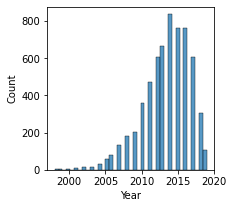

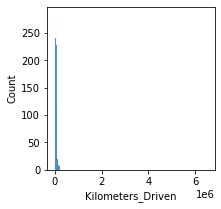

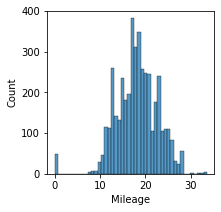

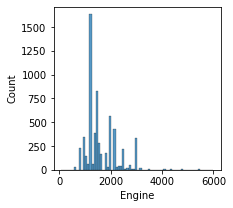

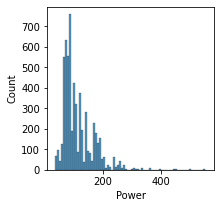

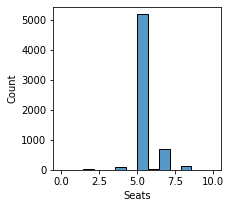

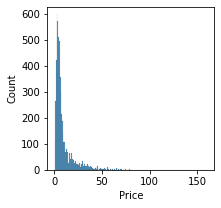

##################################################
Menampilkan distribusi data kategorikal


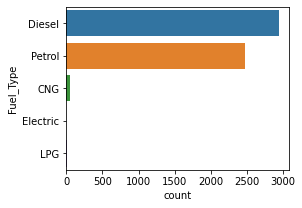

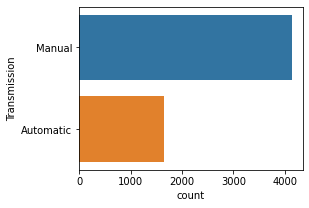

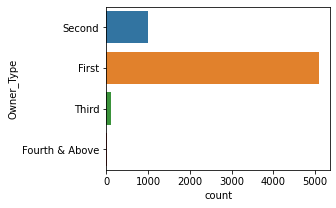

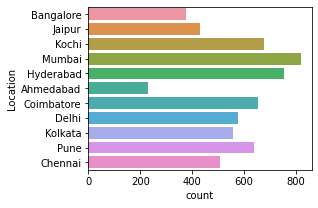

In [28]:
# Jalankan kode ini
show_data_type_and_distribution(df_dropped)

### SOAL 2b: 
Perhatikan jumlah & persentase null pada kolom `New_Price`. Implementasi kode untuk melakukan drop pada kolom tersebut! Lalu, berikan alasan singkat untuk menjustifikasi penghapusan pada kolom tersebut!

In [29]:
## lengkapi kode berikut
#df_dropped = XX -> karena nama df saya adalah df_hasil_drop
df_hasil_drop = df_hasil_drop.drop(columns=['New_Price'])


> Berbeda dengan nilai pada kolom lainnya yang masih memiliki non null value ribuan, tetapi non null value untuk koom New_Price hanya berisi 800 an data atau sebesar 80% dari keseluruhan data. Alasan untuk mendrop kolom ini adalah terlalu banyak data missing (lebih dari 50% data), pengisian dengan mean, median, mode dan metode lainnya justru bisa membuat perubahan dari pattern data nantinya yang dapat menurunkan performa model. Karena, mengisinya bingung dengan apa, dan null data tidak bisa digunakan untuk melakukan pemodelan karena beberapa model tidak menangani null value, maka lebih baik kita drop nilai ini. 

### Soal 2c
Asumsikan bahwa data yang hilang merupakan kondisi `Missing Completely at Random (MCAR)`. Imputasikan variabel lain yang memiliki nilai null sesuai dengan **tipe data (kontinu/diskrit/kategorikal)** dan **distribusi** nya serta berikan alasan singkat! Jangan lupa tampilkan hasil setelah nilai null sudah tidak ada!
<br>**Hint**: terdapat 7 kolom/atribut lain setelah `New_Price` di drop, gunakan method imputasi diatas pada setiap kolom, distribusi dapat dilihat pada visualisasi di atas

In [30]:
df_imputed = df_hasil_drop.copy()

In [31]:
df_hasil_drop['Mileage'].skew()

-0.42974409141226844

In [32]:
df_hasil_drop['Power'].skew()

1.9228553777937802

In [33]:
df_hasil_drop['Kilometers_Driven'].skew()

51.41236790073153

In [34]:
df_hasil_drop['Engine'].skew()

1.4107182085243934

In [35]:
df_hasil_drop['Seats'].skew()

1.8276465119681298

In [36]:
# melakukan imputasi bagi yang numeric dan categorical 
#numerical null : (Kilometers_Driven, Mileage, Engine, Power) ->continuos , Seats (numerik diskret-> tidak mungkin ada seat 4.5)
#categorical null : Fuel_Type, Transmission
#_------------------------------------
# Kilmoeters_Driven : 51.41
# Mileage : -0.42
# Engine : 1.41
# Power : 1.92


#yang bisa menggunakan mean : Mileage

#isi yang kategorikal dengan mode
vars_categorical = ['Fuel_Type', 'Transmission', 'Seats']
for var in vars_categorical:
    df_imputed[var].fillna(df_imputed[var].mode()[0], inplace=True) #[0] untuk ambil yang paling terbesar modenya 

vars_continu = ['Kilometers_Driven', 'Engine', 'Power']
for var in vars_continu:
    df_imputed[var].fillna(df_imputed[var].median(), inplace=True)
vars_continu_mean = ['Mileage']
for var in vars_continu_mean:
    df_imputed[var].fillna(df_imputed[var].mean(), inplace=True)

# Menampilkan hasil imputasi
print(df_imputed.head())


    Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0  Bangalore  2012           155566.0    Diesel       Manual     Second   
1     Jaipur  2014            74000.0    Diesel       Manual     Second   
2      Kochi  2018            53000.0    Diesel       Manual      First   
3     Mumbai  2013            51000.0    Diesel    Automatic      First   
4     Mumbai  2012            51920.0    Petrol       Manual      First   

     Mileage  Engine   Power  Seats  Price       Brand  
0   9.500000  2835.0  118.60    6.0   9.15  Mitsubishi  
1  25.100000  1498.0   98.60    5.0   6.40       Honda  
2  19.670000  1582.0  126.20    5.0  13.34     Hyundai  
3  19.500000  1582.0  126.24    5.0   8.75     Hyundai  
4  18.144166  1497.0  116.30    5.0   4.25       Honda  


> Jawaban singkat alasan pengisian setiap atribut dengan distribusinya:
- 1. Kolom Kilometers_Driven  diimputasi dengan median karena berdistribusi positive skewed atau right skewed dan nilai skewnya sangat besar 51.41, dan tipe datanya adalah numeric kontinu.
- 2. Kolom Mileage diimputasi dengan mean karena berdistribusi negative skewed tetapi sangat mendekati nilai 0 (-0.42), sehingga masih bisa menggunakan nilai mean dan tipe datanya adalah numeric kontinu.
- 3. Kolom Engine diimputasi dengan median karena berdistribusi positive skewed atau right skewed dan nilai skewnya adalah 1.41. Nilai ini sebenarnya masih bisa diimputasi menggunakan median, tetapi karena saya melihat adanya outlier pada data, jadi saya lebih memilih menggunakan median daripada mean dan tipe datanya adalah numeric kontinu, walaupun nilainya terbatas pada bilangan bulat. Namun,  ukuran mesin (dalam cc atau liter) dapat bervariasi secara terus-menerus dalam rentang nilai tertentu.
- 4. Kolom Power diimputasi dengan median karena berdistribusi positive skewed atau right skewed dengan nilai skewednya adalah 1.92. Tipe data adalah numeric kontinu. 
- 5. Kolom Seats diimputasi dengan mode karena tipe datanya adalah numerik diskret. Karena tidak mungkin kita mendapatkan jumlah kursi sebanya 2.5 
- 6. Kolom Fuel_Type diimputasi dengan mode karena tipe datanya adalah kategorikal
- 7. Kolom Transmission diimputasi dengan mode karena tipe datanya adalah kategorikal



## Outlier Handling
**Note:** Pastikan Anda mengerjakan bagian ini dan selanjutnya setelah mengisi *missing values* pada dataset!

Outliers merupakan nilai observasi yang sangat jauh, titik ekstrim, atau tidak wajar dari distribusi suatu variabel. Nilai yang dimaksud ini bisa merupakan nilai yang **terlalu besar** atau **terlalu kecil** dibandingkan nilai-nilai lainnya. Kehadiran outliers dapat terjadi karena beberapa hal:
1. Kesalahan human error pada penginputan
2. Kesalahan sampling atau mengambil sampel yang terlalu ekstrim
3. Kesalahan pemprosesan data
4. Alami/Natural atau memang terdapat outliers pada kenyataan observasi suatu variabel

Dalam mendeterksi dan menganalisis suatu outlier, lagi-lagi penting bagi kita untuk memperhatikan **distribusi** dan konteks suatu atribut serta tujuan secara umum dari penggunaan dataset.

Berikut merupakan semacam **guideline** singkat untuk melakukan analisis outlier:
1. Jika kita menggunakan dataset untuk kepentingan prediksi menggunakan model yang **sensitif terhadap outlier** (contohnya Regresi Linear, selengkapnya akan dibahas pada Lab-lab selanjutnya), kita dapat melakukan **drop outlier**. Membiarkan outlier dapat menyebabkan terjadinya **overfitting** pada model prediksi tertentu ataupun menyebabkan berkurangnya akurasi pada model-model tertentu sehingga perlu di drop. Terlebih lagi, apabila persentase outlier cenderung kecil dan tidak membantu jika dibiarkan.
2. Jika asumsi kita adalah outlier pada data merupakan **noise** atau muncul akibat **error/kesalahan observasi**, sebaiknya dilakukan **drop outlier** untuk membersihkan data.
3. Jika kita perlu melakukan prediksi untuk hal-hal yang mengandalkan *outliers*
4. Jika asumsi kita adalah outlier yang muncul pada data merupakan hal yang alami/wajar sebagaimana kenyataan pada suatu variabel, kita dapat membiarkannya pada data.

Mendeteksi outliers memiliki banyak cara tergantung dari sifat setiap distribusi variabel maupun dataset secara keseluruhan. Berikut merupakan cara yang populer dan banyak digunakan:
1. Z-Score atau Standar Deviasi: Metode ini dapat digunakan untuk mendeteksi outlier pada data yang berdistribusi **normal**. Definisi outlier pada Z-Score adalah nilai-nilai yang jatuh pada **nilai standar deviasi > 3 atau < -3**
2. Boxplot: Metode ini dapat digunakan untuk menampilkan outliers secara visual sehingga lebih intuitif untuk melihat kemunculannya dan melakukan analisis.
3. Interquartile range (IQR): Metode ini mendeketsi outlier yang melebihi batas atas $Q3+ 1.5 *IQR$ atau kurang dari batas bawah $Q1 - 1.5*IQR$ dimana $IQR = Q3-Q1$. Metode ini secara umum dapat digunakan untuk distribusi yang tidak normal

Jalankan kode untuk menampilkan Boxplot untuk DataFrame `df_imputed` untuk membantu menjawab soal berikutnya

In [37]:
def show_boxplot(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for col in df.select_dtypes(include=numerics):
        plt.figure(figsize=(3,3))
        sns.boxplot(x=df[col])
        plt.show()

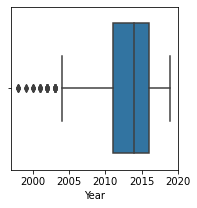

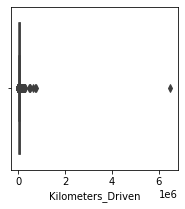

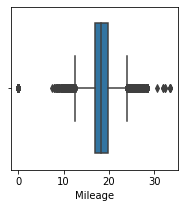

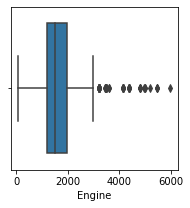

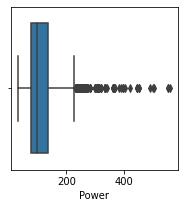

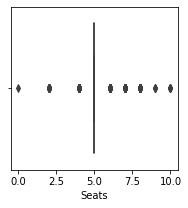

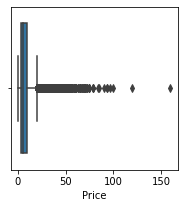

In [38]:
# UNCOMMENT & JALANKAN KODE
show_boxplot(df_imputed)

## Soal 3
Kita dapat melihat bahwa pada setiap variabel memiliki outlier. Asumsikan bahwa kebutuhan kita adalah melakukan prediksi menggunakan model yang sensitif terhadap *outlier* dan *outlier* yang muncul merupakan suatu error dari penginputan atau observasi.

**3a)** Tampilkan outlier dari variabel yang terlihat memiliki distribusi normal berdasarkan Boxplot! <br>
**3b)** Implementasikan cara untuk mendrop outlier dari variabel tersebut <br>
**3c)** Jika ini adalah proyek analisis data pribadi Anda, apakah Anda akan melakukan drop outlier pada atribut yang dimaksud pada nomor 3b? Jelaskan alasan Anda! <br>
**Hints:** 
1. Terdapat 1 variabel yang terlihat cenderung ke distribusi normal
2. Dapat menggunakan IQR atau Z-Score
3. Tipe data numerik kontinu

**Side note:** Di dunia nyata tentu saja kita tidak bisa semudah itu melakukan asumsi untuk mendrop outlier, tetapi kita membuat asumsi ini untuk kepentingan latihan dan belajar

In [39]:
## Gunakan variabel ini 
df_remove_outlier = df_imputed.copy()

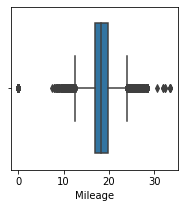

In [40]:
## 3a Kode anda disini, silahkan jika perlu menggunakan cell tambahan
# bedasarkan dari boxplot-> variabel yang terlihat memiliki distirbusi normal adalah Mileage
#tampilkan outlier untuk kolom Mileage dengan boxplot
plt.figure(figsize=(3,3))
sns.boxplot(x=df_remove_outlier['Mileage'])
plt.show()

In [41]:
## 3b Kode anda disini, silahkan jika perlu menggunakan cell tambahan

#drop outlier -> rumus outlier menggunakan IQR
# Q1 — 1.5 * IQR 
# Q3 + 1.5 * IQR
def drop_outliers(df, kolom):
    Q3 = df[kolom].quantile(0.75)
    Q1 = df[kolom].quantile(0.25)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    #kita hanya mempertahankan df yang memiliki nilai kolom berada pada rentang sama dengan batas bawah sampai maksimal senilai batas_atas
    df_tanpa_outliers = df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]
    print(batas_bawah, batas_atas)
    df_outliers = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]
    return df_tanpa_outliers, df_outliers

# Menjalankan fungsi untuk mendrop outlier pada variabel Mileage
df_clean_tanpa_outliers, df_outliers = drop_outliers(df_hasil_drop, 'Mileage')

6.1249999999999964 30.085000000000004


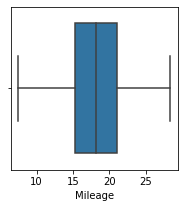

In [42]:
plt.figure(figsize=(3,3))
sns.boxplot(x=df_clean_tanpa_outliers['Mileage'])
plt.show()
#bersih dari outliers

>3c jawaban disini

> Masukan juga sumber jawaban anda disini dan di list referensi di atas jika menggunakan

Keputusan apakah saya akan mendrop outliers tersebut terbagi menjadi empat bagian, yakni: 
- 1. Attribut Mileage sendiri menunjukkan jumlah total mil atau kilometer yang sudah ditempuh oleh mobil sejak pembelian atau sejak dijalankan. Pada analisis karakteristik pasar mobil bekas, mobil bekas bisa saja mempunyai nilai Mileage yang mendekati 0 atau 0. Inibisa saja karena ada kemungkinan adanya masalah mekanis yang serius, kerusakan di odometer atua memang mobil bekas ini jarang atau tidak pernah digunakan. Sedangkan, mileage yang tinggi diatas 30.085 bisa menjelaskan bahwa mobil tersebut sudah sering digunakan dan akan berdampak pada kualitas dan nilai jual dari mobil tersebut. 
- 2. Korelasi antara mileage dan harga, dalam konteks penjualan mobil bekas, nilai attribut ini sangat berpengaruh pada harga, karena semakin tinggi nilai mileage maka semakin rendah juga harganya. 
- 3. Jumlah outliers ada sebanyak 58 row dari 6171 row sehingga persentasenya 0.00939880084265111. Ini bisa menjadi pertimbangan bahwa penghapusan outlier tidak akan berdampak signidikan secara startistik pada data, karena informasi data yang dihapus hanya sebagian kecil
- 4. Jika saya menggunakan algoritma yang sensitif terhadap otuliers maka saya akan drop outliers, seperti ketika saya menggunakan SVR (Support Vector Regression). Beda halnya jika saya menggunakan algoritma seperti Random Forest Regression yang tidak sensitid terhadap outliers, apalagi jumalh outliers sedikit, saya tidak mendrop outliers tersebut.

Saya memilih untuk mempertahankan outliers tersebut karena wajar saja terjadi di kehidupan nyata, korelasi atnara mileage dan harga sehingga saya tidak mau membuang informasi atau pattern data, jumlah outliers yang sedikit, dan pemilihan saya untuk menggunakan model yang tidak sensitif terhadap data yang outliers. 

Referensi: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In [43]:
df_hasil_drop.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.140416,0.322533,-0.051727,0.015310,0.012008,0.306348
Kilometers_Driven,-0.140416,1.000000,-0.052881,0.086805,0.039372,0.062812,0.012721
Mileage,0.322533,-0.052881,1.000000,-0.594529,-0.539169,-0.308555,-0.306641
Engine,-0.051727,0.086805,-0.594529,1.000000,0.864845,0.391157,0.657778
Power,0.015310,0.039372,-0.539169,0.864845,1.000000,0.097082,0.772396
Seats,0.012008,0.062812,-0.308555,0.391157,0.097082,1.000000,0.048320
Price,0.306348,0.012721,-0.306641,0.657778,0.772396,0.048320,1.000000


In [44]:
#Analisis outlier 
df_hasil_drop['Mileage'].describe()

count    4313.000000
mean       18.144166
std         4.580073
min         0.000000
25%        15.110000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [45]:
df_outliers
#outlier ketika nilai Mileage berada di bawah 6.124 dan diatas 30.085
#len(df_outliers)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
50,Chennai,2002,70000.0,Petrol,Manual,Third,0.00,1086.0,NaN,5.0,0.65,Hyundai
172,Kochi,2017,24310.0,CNG,Manual,First,33.44,796.0,40.30,4.0,3.70,Maruti
386,Ahmedabad,2019,4000.0,Diesel,Automatic,First,0.00,1950.0,194.00,5.0,35.00,Mercedes-Benz
446,Hyderabad,2009,NaN,Diesel,Manual,First,0.00,2498.0,NaN,6.0,6.99,Mahindra
649,Chennai,2006,85000.0,Petrol,Manual,Third,0.00,1086.0,NaN,5.0,1.30,Hyundai
743,Mumbai,2003,75000.0,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,16.11,Land
765,Pune,2015,NaN,CNG,NaN,Second,32.26,998.0,58.20,4.0,3.10,Maruti
793,Jaipur,2012,119203.0,Diesel,Automatic,First,0.00,2179.0,115.00,5.0,16.50,Land
810,Hyderabad,2005,NaN,Petrol,Manual,First,0.00,1086.0,NaN,5.0,1.30,Hyundai
819,Hyderabad,2010,NaN,Petrol,Manual,First,0.00,1086.0,62.00,5.0,2.45,Hyundai


## Encoding
**Note:** Jalankan ulang kode pada bagian ini setelah mengisi *missing values*!

Selanjutnya adalah tahapan melakukan encoding, yaitu mengubah tipe data kategorikal menjadi bentuk numerik. Diantara tipe-tipe encoding yang populer digunakan adalah:
1. **One-hot encoding**: mengubah menjadi bentuk binary sesuai dengan jumlah nilai *unique* yang terdapat pada kolom.
2. **Label encoding**: mengubah ke bentuk integer secara *unique*

In [46]:
df_encode = df_imputed.copy()

In [47]:
df_encode.select_dtypes(include=object).columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'], dtype='object')

In [48]:
print("Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal")
print('#'*70)
print()
for col in df_encode.select_dtypes(include=object).columns:
    print(col, f": {len(df_encode[col].unique())}", df_encode[col].unique())
    print("\n")

Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal
######################################################################

Location : 11 ['Bangalore' 'Jaipur' 'Kochi' 'Mumbai' 'Hyderabad' 'Ahmedabad'
 'Coimbatore' 'Delhi' 'Kolkata' 'Pune' 'Chennai']


Fuel_Type : 5 ['Diesel' 'Petrol' 'CNG' 'Electric' 'LPG']


Transmission : 2 ['Manual' 'Automatic']


Owner_Type : 4 ['Second' 'First' 'Third' 'Fourth & Above']


Brand : 31 ['Mitsubishi' 'Honda' 'Hyundai' 'Volkswagen' 'BMW' 'Ford' 'Audi' 'Jeep'
 'Renault' 'Mercedes-Benz' 'Maruti' 'Jaguar' 'Skoda' 'Mahindra' 'Mini'
 'Toyota' 'Nissan' 'Tata' 'Chevrolet' 'Fiat' 'Volvo' 'Land' 'Porsche'
 'Datsun' 'Isuzu' 'Force' 'Smart' 'ISUZU' 'Lamborghini' 'Ambassador'
 'Bentley']




### Label Encoding

Menggunakan **LabelEncoder** pada kolom `Location` & `Brand`

In [49]:
label_encoder = LabelEncoder()

df_encode['Location_enc'] = label_encoder.fit_transform(df_encode['Location'])
df_encode['Brand_enc'] = label_encoder.fit_transform(df_encode['Brand'])

`Location` telah berhasil di encode menjadi variabel `Location_enc` dan `Brand` telah berhasil di encode menjadi variabel `Brand_enc`

Selain menggunakan **LabelEncoder**,  tipe encoding ini bisa juga dilakukan secara manual menggunakan fungsi `map()`

In [50]:
df_encode['Owner_Order'] = df_encode['Owner_Type'].map({'Second':2, 'First':1, 'Third':3, 'Fourth & Above':4})

In [51]:
df_encode['Owner_Order'].unique()

array([2, 1, 3, 4], dtype=int64)

`Owner_Type` telah berhasil di encode menjadi variabel `Owner_Order`

## One-Hot Encoding

Menggunakan **get_dummsies** pada kolom `Fuel_Type` dan `Transmission`

In [52]:
df_encode = pd.get_dummies(df_encode, columns = ['Fuel_Type', 'Transmission'], drop_first=True) 

Selanjutnya kita akan mendrop kolom yang tidak digunakan

In [53]:
df_encode = df_encode.drop(df_encode.select_dtypes(include=object),axis=1)

In [54]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6171 entries, 0 to 6217
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 6171 non-null   int64  
 1   Kilometers_Driven    6171 non-null   float64
 2   Mileage              6171 non-null   float64
 3   Engine               6171 non-null   float64
 4   Power                6171 non-null   float64
 5   Seats                6171 non-null   float64
 6   Price                6171 non-null   float64
 7   Location_enc         6171 non-null   int32  
 8   Brand_enc            6171 non-null   int32  
 9   Owner_Order          6171 non-null   int64  
 10  Fuel_Type_Diesel     6171 non-null   uint8  
 11  Fuel_Type_Electric   6171 non-null   uint8  
 12  Fuel_Type_LPG        6171 non-null   uint8  
 13  Fuel_Type_Petrol     6171 non-null   uint8  
 14  Transmission_Manual  6171 non-null   uint8  
dtypes: float64(6), int32(2), int64(2), uin

Semua kolom sudah berhasil diubah menjadi bentuk numerik, namun masih ada satu tahapan lagi sebelum data dapat digunakan untuk keperluan machine learning.

### Soal 4a
Jelaskan perbedaan antara LabelEncoding dengan OneHotEncoding dari sisi tipe data yang cocok digunakan! Dari dataset, klasifikasikan setiap data kategorikal ke dalam tipe datanya **serta** lebih cocok encoding tipe apa!  

In [55]:
len(df_imputed['Location'].unique())

11

In [56]:
df_imputed.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6171 entries, 0 to 6217
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6171 non-null   object 
 1   Year               6171 non-null   int64  
 2   Kilometers_Driven  6171 non-null   float64
 3   Fuel_Type          6171 non-null   object 
 4   Transmission       6171 non-null   object 
 5   Owner_Type         6171 non-null   object 
 6   Mileage            6171 non-null   float64
 7   Engine             6171 non-null   float64
 8   Power              6171 non-null   float64
 9   Seats              6171 non-null   float64
 10  Price              6171 non-null   float64
 11  Brand              6171 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 626.7+ KB


> Jawaban disini
<br>
> Perbedaan LabelEncoding dengan OneHotEncoding adala label digunakan untuk mengubah nilai dari satu kolom kategorikal menjadi nilai numerik ,dan tipe datanya adalah ordinal atau ada urutan atau tingkatan di antara nilai -nailia katerforikal tersebut. Misalnya: ranking

> Sedangkan OneHotEncoding mengubah nilai kolom suatu kategorikal menjadi beberapa kolom atau fitur yang berisi nilai biner (1 atau 0). Nilai- nilai ini menandakan adanya atau tidak adanya nilai di suatu kolom kategorikal. Misalnya: warna, negara

> Contoh kolom :
- Kolom Location dengan OneHotEncoding, karena tidak ada urutan dalam data tersebut, seperti Mumbai dengan Kochai tidak ada urutan
- Kolom Fuel_Type dengan OneHotEncoding, karena tidak ada urutan dalam data tersebut. Value unik di kolom ini adalah ['Diesel', 'Petrol', 'CNG', 'Electric', 'LPG']
- Kolom Transmission dengan LabelEncoding, walaupun tidak ada urutan dalam data tersebut dengan value ['Manual', 'Automatic']. Namun, nilai dari kolom tersebut yang unik hanya dua, jika kita menggunakan OneHotEncoder, maka akan ada dua kolom baru Is_Manual dan Is_Automatic. Ketika Is_Manual bernilai 1 , maka Is_automatic bernilai 0 dan sebaliknya, ini justru memberikan redundansi data.
- Kolom Owner_Type dengan LabelEncoder karena valuenya adalah 'Second', 'First', 'Third', 'Fourth & Above', disini mengandung urutan apakah mobil tersebut kepemilikan pertama, kedua, ketiga, atau diatasnya.
- Kolom Brand dengan OneHotEncoding, karena tidak ada urutan dama data tersebut, yakni 'Mitsubishi', 'Honda', 'Hyundai', 'Volkswagen',...

### Soal 4b
Pada atribut `Location` & `Brand`, mengapa keduanya secara umum tidak cocok menggunakan LabelEncoding? Berikan alasan mengapa pada kasus tertentu tipe data tersebut bisa saja dilakukan LabelEncoding! <br>
**Hint:** Dimensi

> Jawaban disini
<br>
> Keduanya secara umum tidak cocok menggunakan label encoding karena nilai data di kolom Location dan Brand tidak memiliki urutan atau ordinal dan nilai unik yang banyak dan berbeda-beda. Jika kita menggunakan label encoding untuk atribut lokasi dan mobil yang bervariasi. Meskipun menghasilkan banyak nilai numerik yang tidak bermakna. Seperti nilai unik dari kolom Brand yang sebanyak 31, dan bisa saja model yang digunakan justru malah salah mengartikan menganggap bahwa nilai 1 lebih kecil daripada nilai 31, padahal sebenarnya nilai 1 dan 31 merepresentasikan suatu nilai brand tertentu.
> Namun, di beberapa kasus tertentu tipe data tersebut memang bisa saja dilakukan Label Encoding, seperti jika terdapat kebutuhan untuk mengurangi dimensi data yang tinggi, ini berarti ada 42 kolom baru jika kita melaluakn OneHotEoncidng. Penggunaan Label Encoding untuk memperkecil dimensi data, tetapi tetap model yang digunakan mampu mengetahui kategori yang dibutuhkan tersebut, seperti ketika kita menggunakan algoritma seperti Naive Bayes atau algoritma klasifikasi pohon keputusan yang bisa menangani nilai numerik.


Referensi : https://medium.com/@chandradip93/when-to-use-labelencoder-and-when-to-use-onehotencoder-3636bce3876d

### Soal 4c
Bacalah dua sumber berikut:
- https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
- https://contrib.scikit-learn.org/category_encoders/ dokumentasi library`category_encoder` 
<br> <br> 
Lengkapi kode berikut untuk mengimplementasikan salah satu tipe encoder selain LabelEncoder atau OneHotEncoder dari library untuk variabel `Location` & `Brand`, alasan singkat Anda menggunakan tipe encoder tersebut **serta** kemungkinan kekurangan dari encoder yang dipakai!

In [57]:
df_imputed

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Bangalore,2012,155566.0,Diesel,Manual,Second,9.500000,2835.0,118.60,6.0,9.15,Mitsubishi
1,Jaipur,2014,74000.0,Diesel,Manual,Second,25.100000,1498.0,98.60,5.0,6.40,Honda
2,Kochi,2018,53000.0,Diesel,Manual,First,19.670000,1582.0,126.20,5.0,13.34,Hyundai
3,Mumbai,2013,51000.0,Diesel,Automatic,First,19.500000,1582.0,126.24,5.0,8.75,Hyundai
4,Mumbai,2012,51920.0,Petrol,Manual,First,18.144166,1497.0,116.30,5.0,4.25,Honda
...,...,...,...,...,...,...,...,...,...,...,...,...
6212,Kolkata,2019,80000.0,Diesel,Manual,First,18.144166,2982.0,171.00,7.0,8.99,Toyota
6213,Mumbai,2012,53000.0,Diesel,Manual,First,15.100000,2179.0,140.00,7.0,7.90,Mahindra
6215,Pune,2013,47000.0,Petrol,Manual,First,18.000000,1198.0,86.70,5.0,4.15,Honda
6216,Kochi,2019,53000.0,Petrol,Automatic,First,14.670000,1798.0,177.46,5.0,27.30,Skoda


In [62]:
import category_encoders as ce

df_cat_encoder = df_imputed.copy() # gunakan df ini

# Hints
#encoder = SomethingEncoder(__)
#encoder.fit(__)
# ......
#df_cat_encoder.head()


encoder = ce.TargetEncoder(cols=['Location', 'Brand'])
df_encoded = encoder.fit_transform(df_cat_encoder, df_cat_encoder['Price'])
df_encoded.head()

# lengkapi kode ini boleh menggunakan cell tambahan

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,13.315147,2012,155566.0,Diesel,Manual,Second,9.500000,2835.0,118.60,6.0,9.15,10.668070
1,5.771526,2014,74000.0,Diesel,Manual,Second,25.100000,1498.0,98.60,5.0,6.40,5.390721
2,11.060399,2018,53000.0,Diesel,Manual,First,19.670000,1582.0,126.20,5.0,13.34,5.332606
3,9.519653,2013,51000.0,Diesel,Automatic,First,19.500000,1582.0,126.24,5.0,8.75,5.332606
4,9.519653,2012,51920.0,Petrol,Manual,First,18.144166,1497.0,116.30,5.0,4.25,5.390721


> Alasan saya menggunakan target encoder adalah Target Encoder biasanya digunakan dengan memperhitungkan target variable (pricing) saat encoding. Ini merepresentasikan hubungan yang lebih baik (informasi penting) antara variabel kategorikal (Location dan Brand) dengan target variabel untuk dimasukkan ke dalam model nantinya. Dibandingkan menggunakan OneHotEncoder atau LabelEncoder, kita bisa mengurangi dimensi data dengan menggunakan nilai0nilai kategorikal terbuat dengan nilai numerik tunggal. Ini berguna untuk efisiensi memori dan kompleksitas model yang digunakan. Oleh karena itu, encoder jenis ini sesuai digunakan ketika suatu variabel kategorikal memiliki banyak nilai unik dan kit mau tetap mengahsilkan representasi yang informatif dari variabel tersebut tanpa memiliki tambahan dimensi yang sangat besar.





## Preparation for Machine Learning Training
**Note:** Jalankan ulang kode pada bagian ini setelah mengisi *missing values* dan menjalankan kode pada bagian Encoding!

Kita sampai pada tahapan dimana data yang kita gunakan sudah **bersih** dari nilai-nilai duplikat, *missing values*, serta *outlier*. Namun demikian, masih terdapat beberapa langkah sebelum kita melatih model menggunakan dataset kita, diantaranya adalah:
1. Memisahkan variabel *target* dan *predictor*. Pada dataset ini, kita memiliki satu target, yaitu **price** yang dapat diprediksi secara regresi sedangkan predictor berupa semua atribut lain. 
2. Melakukan feature scaling pada *predictor*, umumnya menggunakan *scaler* sesuai kebutuhan
3. Memisahkan dataset menjadi *train*, *test*, *validaation* dalam proporsi tertentu. Ini akan dijelaskan pada Lab-lab selanjutnya

Selanjutnya kita akan memisahkan dataset menjadi `X` sebagai *predictor* dan `Y` sebagai *target*

In [85]:
df_training = df_encode.copy()
X = df_training.drop('Price',axis=1)
Y = df_training['Price']

In [86]:
X

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_enc,Brand_enc,Owner_Order,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2012,155566.0,9.500000,2835.0,118.60,6.0,1,21,2,1,0,0,0,1
1,2014,74000.0,25.100000,1498.0,98.60,5.0,6,9,2,1,0,0,0,1
2,2018,53000.0,19.670000,1582.0,126.20,5.0,7,10,1,1,0,0,0,1
3,2013,51000.0,19.500000,1582.0,126.24,5.0,9,10,1,1,0,0,0,0
4,2012,51920.0,18.144166,1497.0,116.30,5.0,9,9,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,2019,80000.0,18.144166,2982.0,171.00,7.0,8,28,1,1,0,0,0,1
6213,2012,53000.0,15.100000,2179.0,140.00,7.0,9,17,1,1,0,0,0,1
6215,2013,47000.0,18.000000,1198.0,86.70,5.0,10,9,1,0,0,0,1,1
6216,2019,53000.0,14.670000,1798.0,177.46,5.0,7,25,1,0,0,0,1,0


In [87]:
Y

0        9.15
1        6.40
2       13.34
3        8.75
4        4.25
        ...  
6212     8.99
6213     7.90
6215     4.15
6216    27.30
6217     3.65
Name: Price, Length: 6171, dtype: float64

**Note:** penting bahwa index keduanya bersesuaian dengan dataset awal agar hasil prediksi sesuai

Selanjutnya kita dapat melakukan feature scaling data.

Berikut merupakan beberapa kegunaan melakukan feature scaling data:

1. Menyetarakan range data yang sangat berbeda antar variabel
2. Mengurangi penggunaan memori karena penggunaan angka yang cenderung kecil
3. Mempercepat jalannya prediksi pada model prediksi tertentu
4. Mempengaruhi performa model prediksi (regresi, klasifikasi) tertentu
5. Menyetarakan *range* data yang sangat berbeda antar variabel
6. Mengurangi dampak outliers pada prediksi

### Soal 5a 
Buatlah implementasi kode feature scaling pada `X` menggunakan salah satu Scaler yang terdapat di dokumentasi `scikit-learn` berikut: https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling 

In [88]:
from sklearn.preprocessing import RobustScaler


#hanya scaling data numerik yang kontinu dan yang bukan hasil dari encoding, sepert KiloMeters_Driven, Engine, Power, Mileage, Seats

continuous_features = ["Kilometers_Driven", "Engine", "Power", "Mileage"]

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Lakukan scaling hanya pada fitur-fitur yang dipilih
X_scaled = scaler.fit_transform(X[continuous_features])

# Buat DataFrame baru dengan fitur-fitur yang sudah di-scale
df_scaled = pd.DataFrame(X_scaled, columns=continuous_features)

In [89]:
df_scaled.describe()

,Kilometers_Driven,Engine,Power,Mileage
count,6171.000000,6171.000000,6171.000000,6.171000e+03
mean,0.260560,0.162434,0.240049,-3.822722e-16
std,5.181454,0.760851,0.888015,1.334097e+00
min,-3.107588,-1.807888,-1.071559,-6.322009e+00
25%,-0.470588,-0.375318,-0.342653,-4.683507e-01
50%,0.000000,0.000000,0.000000,0.000000e+00
75%,0.529412,0.624682,0.657347,5.316493e-01
max,379.235294,5.731552,7.678649,5.364402e+00


In [90]:
df_scaled

,Kilometers_Driven,Engine,Power,Mileage
0,6.033294,1.707379,0.333000,-3.011905
1,1.235294,0.006361,0.000166,2.423635
2,0.000000,0.113232,0.459477,0.531649
3,-0.117647,0.113232,0.460143,0.472416
4,-0.063529,0.005089,0.294725,0.000000
...,...,...,...,...
6166,1.588235,1.894402,1.205026,0.000000
6167,0.000000,0.872774,0.689133,-1.060685
6168,-0.352941,-0.375318,-0.197870,-0.050232
6169,0.000000,0.388041,1.312531,-1.210511


In [95]:
df_scaled.describe()

,Kilometers_Driven,Engine,Power,Mileage
count,6171.000000,6171.000000,6171.000000,6.171000e+03
mean,0.260560,0.162434,0.240049,-3.822722e-16
std,5.181454,0.760851,0.888015,1.334097e+00
min,-3.107588,-1.807888,-1.071559,-6.322009e+00
25%,-0.470588,-0.375318,-0.342653,-4.683507e-01
50%,0.000000,0.000000,0.000000,0.000000e+00
75%,0.529412,0.624682,0.657347,5.316493e-01
max,379.235294,5.731552,7.678649,5.364402e+00


In [91]:
X

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_enc,Brand_enc,Owner_Order,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2012,155566.0,9.500000,2835.0,118.60,6.0,1,21,2,1,0,0,0,1
1,2014,74000.0,25.100000,1498.0,98.60,5.0,6,9,2,1,0,0,0,1
2,2018,53000.0,19.670000,1582.0,126.20,5.0,7,10,1,1,0,0,0,1
3,2013,51000.0,19.500000,1582.0,126.24,5.0,9,10,1,1,0,0,0,0
4,2012,51920.0,18.144166,1497.0,116.30,5.0,9,9,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,2019,80000.0,18.144166,2982.0,171.00,7.0,8,28,1,1,0,0,0,1
6213,2012,53000.0,15.100000,2179.0,140.00,7.0,9,17,1,1,0,0,0,1
6215,2013,47000.0,18.000000,1198.0,86.70,5.0,10,9,1,0,0,0,1,1
6216,2019,53000.0,14.670000,1798.0,177.46,5.0,7,25,1,0,0,0,1,0


In [93]:
# Masukkan nilai fitur yang sudah discaling ke dalam DataFrame X
X['Kilometers_Driven'] = df_scaled['Kilometers_Driven']
X['Engine'] = df_scaled['Engine']
X['Power'] = df_scaled['Power']
X['Mileage'] = df_scaled['Mileage']
X


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_enc,Brand_enc,Owner_Order,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2012,6.033294,-3.011905,1.707379,0.333000,6.0,1,21,2,1,0,0,0,1
1,2014,1.235294,2.423635,0.006361,0.000166,5.0,6,9,2,1,0,0,0,1
2,2018,0.000000,0.531649,0.113232,0.459477,5.0,7,10,1,1,0,0,0,1
3,2013,-0.117647,0.472416,0.113232,0.460143,5.0,9,10,1,1,0,0,0,0
4,2012,-0.063529,0.000000,0.005089,0.294725,5.0,9,9,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,2019,NaN,NaN,NaN,NaN,7.0,8,28,1,1,0,0,0,1
6213,2012,NaN,NaN,NaN,NaN,7.0,9,17,1,1,0,0,0,1
6215,2013,NaN,NaN,NaN,NaN,5.0,10,9,1,0,0,0,1,1
6216,2019,NaN,NaN,NaN,NaN,5.0,7,25,1,0,0,0,1,0


In [94]:
X.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_enc,Brand_enc,Owner_Order,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
count,6171.000000,6126.000000,6126.000000,6126.000000,6126.000000,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000,6171.000000
mean,2013.355696,0.258720,0.000549,0.162436,0.239499,5.275968,5.622914,15.335764,1.202722,0.592449,0.000324,0.001458,0.397991,0.735699
std,3.265165,5.198753,1.335100,0.761485,0.888208,0.806480,2.956506,8.065316,0.456786,0.491419,0.018001,0.038165,0.489523,0.440996
min,1998.000000,-3.107588,-6.322009,-1.807888,-1.071559,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,-0.470588,-0.468351,-0.375318,-0.342653,5.000000,3.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2016.000000,0.529412,0.531649,0.622774,0.656973,5.000000,8.000000,19.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2019.000000,379.235294,5.364402,5.731552,7.678649,10.000000,10.000000,30.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Soal 5b
Berikan beberapa alasan singkat mengapa Anda menggunakan tipe scaler yang Anda pilih pada **Soal 5a**

> Jawaban disini 
<br>
Alasan saya menggunakan RobustScaler adalah scaler ini dibandingkan dengan scaler lainnya lebih resilien terhadap outliers yang berada pada beberapa fitur kontinu di data, karena menggunakan nilai median dan IQR yang kurang sensitif terhadap nilai ekstrim dibandingkan dengan menggunakan rata-rata dan deviasi standar. Kedua, scaler ini cocok untukku data yang tidak terdistribusi nomor atau memiliki skewness tinggi, scaler ini mempertahankan struktur data asli sehingga tidak merubah distribusi data secara signifikan. Scaler ini cocok untuk memberikan hasil scaling yang lebih konsisten untuk seluruh dataset karena tahan terhadap skala yang berbeda-beda dan outlier yang signifikan di beberapa fitur.  





# Dimensionality Reduction


Pada analisis data dan *machine learning*, dimensionality reduction, sesuai namanya, mengacu pada teknik untuk mengurangi dimensi data namun berusaha untuk **memaksimalkan** informasi yang dapat dipertahankan. 

Teknik dimensionality reduction terbagi menjadi dua kategori besar:
1. Feature Selection: mencari sekelompok fitur-fitur yang paling relevan untuk prediksi. Contohnya: 
    * Filter methods 
    * Wrapper methods
    * Embedded methods
2. Feature Extraction: melakukan pemetaan suatu atribut menjadi atribut lain untuk mengurangi dimensi. Contohnya: 
    * Principal Component Analysis (PCA)
    * Singular Value Decomposition (SVD)
    * Linear Discriminant Analysis (LDA)

## Principal Component Analysis (PCA)

Merupakan salah satu teknik dimensionality reduction. Teknik ini pertama kali dikembangkan oleh Karl Pearson pada 1901. Cara kerjanya adalah mengindentifikasi vektor-vektor ortogonal yang disebut sebagai *principal components* yang mencoba menangkap variansi secara maksimal. <br> <br> *principal components* pertama menangkap variansi terbesar pada data, *principal components* kedua menangkap variansi maximum yang *orthogonal* dari *principal components* pertama, dan seterusnya. Variansi data dapat ditangkap secara sempurna ketika jumlah *principal components* = jumlah dimensi. **Namun,** pada sebagian besar kasus, terutama data dengan dimensi yang sangat besar, variansi data dapat ditangkap secara cukup menggunakan jumlah *principal components* yang relatif kecil.

PCA memanfaatkan konsep kombinasi linear, eigenvektor, dan eigenvalues untuk menggabungkan fitur-fitur untuk membuat *principal components* yang dapat menangkap variansi secara efisien 

#### Tahapan implementasi PCA menggunakan scikit-learn 

Library `scikit-learn` telah menyediakan modul `decomposition` yang dapat digunakan untuk melakukan PCA. 

Dokumentasi lebih lanjut dapat dilihat di https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

1. Import data dan library

In [99]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

 
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])  
df_cancer2 = df_cancer.copy()
# mengukur shape input
print(df_cancer.shape)

(569, 30)


Terlihat bahwa dimensi data cukup besar, yaitu 30.

2. Melakukan standarisasi

In [100]:
scaler = StandardScaler()
scaler.fit(df_cancer)
scaled_data = scaler.transform(df_cancer)

3. Melakukan fitting PCA

In [101]:
pca = PCA(n_components=2) 
# Disini kita bisa menentukan jumlah dimensi/komponen yang dipertahankan, secara default semua dimensi/komponen dipertahankan

pca.fit(scaled_data)
transformed = pca.transform(scaled_data)

### Soal 6a
Jika ini adalah proyek analisis data pribadi Anda, apakah Anda akan melakukan standarisasi pada dataset pada tahapan sebelum melakukan fitting PCA? Jelaskan alasan Anda!

In [104]:
# Silahkan menggunakan implementasi kode untuk explorasi data (distribusi, statistik, dst.)
#numerical kontinu semua untuk semua datasetnya
df_cancer2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [107]:
#cek skewness dari distribusi data, min max, dan skewnya 
df_cancer2.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [109]:
df_cancer2.skew()
# yang mendekati 0 adalha 0.4 -> dan 0.4 ini masih bersifat postive skewed atau right skewwd

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

> jawaban disini 
<br>
Alasan menggunakan standarisasi sebelum fitting PCA adalah utnuk menjaga perbedaan skala antar fitur (menghidnari bias skala), karena PCA nanti kovariansnya bukan lagi distandararisasi di skala 1 sampai 0, dan menghidnari korelasi karena bergantung ada skala (misalnya yang lebih besar nilainya lebih berpengaruh pada target varibael). 

> Setidaknya ada dua hal yang bisa kita perhatikan, pertama, dari segi min dan max untuk mengetahui range dari atribut-atribut data tersebut berapa, kedua, dari segi apakah mean lebih besar atau lebih kecil dari median (50%) untuk memperhatikan skewnessnya.
> - Dilihat dari range tiap atribut. Ketika melihat min value tiap attribut ini sangat bervariasi mulai dari 0.0xx (utnu fitur seperti mean smoothness, mean compactness, dan sebagainya) sampai ke nilai 143.5. Belum lagi nilai max sangat bervariasi juga mulai dari 0.3 sampai ributan. Ini berarti terdapat rentang nilai yang lebar dan menunjukkan perbedaan signifikan dalam skala. Ini bisa menyebabkan ketidakseimbangan dalam kontribusi attribut maupun interpretasi yang tidak akurat dari bobot atribut.
> - Dilihat dari beberapa attribut ada beberapa fitur yang memiliki skewness besar seperti pada fitur 'worst area' dengan mean sebesar 880.583128 sedangkan mediannya adalah 686.5, ini berarti fitur tersebut skew positif atau right skewed.

> Jika ini dibiarkan maka akan membaut bias dalam perhitungan varians PCA nantinya dan PCA tidak akan bisa menemukan optimal Principal Components yang malah membawa kita ke hasil yang salah, sehingga perlu dilakukan standarisasi .



Referensi : https://medium.com/analytics-vidhya/principal-component-analysis-pca-8a0fcba2e30c

### Visualisasi PCA 

Hasil PCA menjadi dua dimensi

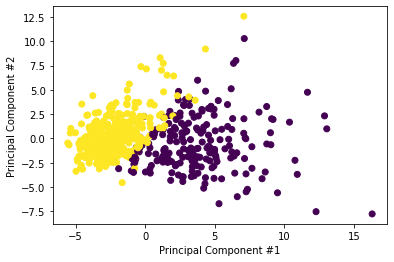

In [110]:
plt.figure(figsize=(6, 4))
 
plt.scatter(transformed[:, 0], transformed[:, 1],
            c=cancer['target'],)
 
# labeling x and y axes
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.show()

In [111]:
print("Cumulative explained variance ratio for 2 dimension:",np.sum(pca.explained_variance_ratio_[:2]))

Cumulative explained variance ratio for 2 dimension: 0.632432076515595


Melakukan PCA dengan semua dimensi untuk melihat variansi data yang ditangkap 

In [112]:
pca_all = PCA() 
pca_all.fit(scaled_data)
transformed_all = pca_all.transform(scaled_data)

In [113]:
print(np.cumsum(pca_all.explained_variance_ratio_[:10]))

[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881]


In [118]:
print(np.cumsum(pca_all.explained_variance_ratio_[:]))

[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


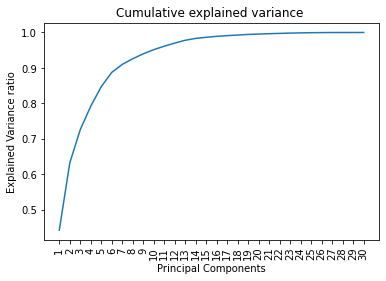

In [114]:
plt.plot(range(1,31),    np.cumsum(pca_all.explained_variance_ratio_))
plt.ylabel('Explained Variance ratio')
plt.xlabel('Principal Components')
plt.xticks(range(1,31),
           [f"{i}" for i in range(1,31)], rotation=90)
plt.title('Cumulative explained variance ')
plt.show()

In [115]:
print("Cumulative explained variance ratio for 2 dimension:",np.sum(pca.explained_variance_ratio_[:2]))

Cumulative explained variance ratio for 2 dimension: 0.632432076515595


### Soal 6b
Berikan observsi dan interpretasi anda mengenai: 
1. visualisasi hasil PCA dalam 2 dimensi di atas 
2. visualisasi *cumulative explained variance* di atas

>1. Pada visualisasi scatter  plot dengan Principal COmponent #1 dan #2, saya bisa melihat adanya sepert batas antara kedua kelas yang lumayan jelas terlihat yang dapat dibagi dengan satu garis linear. Meskipun begitu, terdapat masih beberapa kelas antara yang kanker dan tidak kanker yang masih overlap satu sama lain atau tidak terbagi dengan jelas. Ini bisa menandakan bahwa kita membutuhkan dimensi yang lebih tinggi,seperti PC3, PC4 dan seterusnya (tetap juga di cek varians yang dihasilkan dengan penambahan PC). Kedua ada beberapa data outlier yang jauh dari cluster data berkumpul, namun data tersebut jika dia lebih dekat dengan sumbu kelas PC1, dia akan dianggap sebagai kelas yang sama. Ketiga, dilihat dari sumbu kemungkinan besar PC#1 mewakili faktor yang paling dominan dalam data, karena perbedaan pada nilai sumbu x dapat memiliki pola terhadap perbedaan di mana kelas tersebut berada, dibandingkan dengan hanya melihat pada PC#2.
> 2. Cumulative explained variance menunjukkan bagaimana nilai variance yang bisa kita dapatkan ketika kita menggunakan principal components dalam jumlah tertentu. Di gambar tersebut terdapat 30 principal components yang seperti nya sudah diurutkan dari varians yang terbesar (dari kiri) sampai ke varians terkecil (ke kanan). Target kita adalah mencari nilai varians yang terbesar dengan jumlah principal components yang digunakan seminimal mungkin, karena kita juga memperhatikan masalah banyak dimensi. Variance yang besar juga menjelaskan bahwa data tersebut kaya akan informasi yang berguna ketika kita masukkan ke dalam machine learning model kita. Pada saat penggunaan komponen 1, kita bisa melihat skor variance-nya sebesar 0.4, kemudian ketika tambah komponen dua menjadi 0.6. Ini ada pertambahan 0.2. Selanjutnya jika ditambahkan sampai komponen keenam maka akan mendapatkan variansi 0.88. Ketika sampai komponen 14, kita akan mendapatkan variansi 0.98. Setelah itu pertambahan komponen selanjutnya hanya memberikan selisih pertambahan yang sedikit. Penentuan memilih sampai komponen yang mana tergantung pada tujuan variansi dan kekuatan komputasi dengan banyak dimensi tertentu. Saya tetapi lebih memilih untuk mengambil ketika komponen ke 7 ditambahkan karena variance sudah berada di angka 91%, data ini sudah sangat cukup kaya akan informasi dengan dimensi hanya 7.



Referensi : https://bioturing.medium.com/how-to-read-pca-biplots-and-scree-plots-186246aae063 